# Titanic data Analysis

## 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Loading data

In [2]:
titanic = pd.read_csv(r'D:\1. Professionall\Data Science\08-10-2023\train.csv', header = 0, dtype={'Age': np.float64})

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Understanding meaning of columns

Data Dictionary:                                                                 
Variable Description

- Survived - Survived (1) or died (0)
- Pclass - Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name - Passenger’s name
- Sex - Passenger’s sex
- Age - Passenger’s age
- SibSp - Number of siblings/spouses aboard
- Parch - Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.)
- Ticket - Ticket number
- Fare - Fare
- Cabin - Cabin
- Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


## 4. Analyzing data

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 5. Modifying a column 

Changing Value of column Sex for "Male, Female" string values to numeric values

- male=1 
- female=2

In [6]:
def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
titanic["Gender"]=titanic["Sex"].apply(getNumber)  # Adding new column to dataset

del titanic["Sex"]  # Deleting sex column since it is not use full further

titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


## 6. Deleting Columns

In [7]:
# Name, Ticket, Fare and Cabin columns as they can never decide survival of a person, hence we can safely delete it

del_columns = ['Name', 'Ticket', 'Fare', 'Cabin']
titanic.drop(del_columns, axis=1, inplace=True)

titanic.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,2
2,3,1,3,26.0,0,0,S,2
3,4,1,1,35.0,1,0,S,2
4,5,0,3,35.0,0,0,S,1


## 7. Filling null values in `Age` column

In this process we are going to create new `age` column and replace `Age` column values in it and fill null values in new column

- Create a new `age` column 
- find mean of ages of survived people
- Fill them in `age` column with null variable of survival people
- Fill null positions of not survived opeople with mean of ages of not survived people
- delet old `Age` column

In [8]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Age             True
SibSp          False
Parch          False
Embarked        True
Gender         False
dtype: bool

In [9]:
titanic.isnull().sum()  # there are 117 null values in Age

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

In [10]:
titanic[10:30]   # column 17, 19 are survived and no age mentioned
                 # column 26, 29 are not survived and no age mentioned

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
10,11,1,3,4.0,1,1,S,2
11,12,1,1,58.0,0,0,S,2
12,13,0,3,20.0,0,0,S,1
13,14,0,3,39.0,1,5,S,1
14,15,0,3,14.0,0,0,S,2
15,16,1,2,55.0,0,0,S,2
16,17,0,3,2.0,4,1,Q,1
17,18,1,2,NaN,0,0,S,1
18,19,0,3,31.0,1,0,S,2
19,20,1,3,NaN,0,0,C,2


In [11]:
meanS = titanic[titanic.Survived==1].Age.mean()

meanS

28.343689655172415

In [12]:
titanic['age'] = np.where(pd.isnull(titanic.Age) & titanic['Survived']==1  ,meanS, titanic['Age'])

titanic[10:20]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
10,11,1,3,4.0,1,1,S,2,4.00000
11,12,1,1,58.0,0,0,S,2,58.00000
12,13,0,3,20.0,0,0,S,1,20.00000
13,14,0,3,39.0,1,5,S,1,39.00000
14,15,0,3,14.0,0,0,S,2,14.00000
15,16,1,2,55.0,0,0,S,2,55.00000
16,17,0,3,2.0,4,1,Q,1,2.00000
17,18,1,2,NaN,0,0,S,1,28.34369
18,19,0,3,31.0,1,0,S,2,31.00000
19,20,1,3,NaN,0,0,C,2,28.34369


In [13]:
meanNS = titanic[titanic.Survived==0].Age.mean()

meanNS

30.62617924528302

In [14]:
titanic.age.fillna(meanNS, inplace=True)

titanic[20:30]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
20,21,0,2,35.0,0,0,S,1,35.000000
21,22,1,2,34.0,0,0,S,1,34.000000
22,23,1,3,15.0,0,0,Q,2,15.000000
23,24,1,1,28.0,0,0,S,1,28.000000
24,25,0,3,8.0,3,1,S,2,8.000000
25,26,1,3,38.0,1,5,S,2,38.000000
26,27,0,3,NaN,0,0,C,1,30.626179
27,28,0,1,19.0,3,2,S,1,19.000000
28,29,1,3,NaN,0,0,Q,2,28.343690
29,30,0,3,NaN,0,0,S,1,30.626179


In [15]:
titanic.isnull().sum()  # No null values in new " age " column

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age              0
dtype: int64

In [16]:
del titanic['Age']             # Deleting olg Age column

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


## 8. Checking importance of `Embarked` column

In [17]:
# Finding the number of people who have survived 
# given that they have embarked or boarded from a particular port

survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]

print(survivedQ)
print(survivedC)
print(survivedS)

30
93
217


In [18]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]

print(survivedQ)
print(survivedC)
print(survivedS)

47
75
427


- Since there is a significant importance of `Embarked` for survival of passangers we cannot delet it
- There are few null values in Embarked column, Let's delet that rows
- Since Embarked column is important lets convert data into numerical

In [19]:
titanic.dropna(inplace=True)

In [20]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       0
Gender         0
age            0
dtype: int64

In [21]:
titanic.rename(columns={'age':'Age'}, inplace=True)
titanic.rename(columns={'Gender':'Sex'}, inplace=True)

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [22]:
def getEmb(str):
    if str=="S":
        return 1
    elif str=='Q':
        return 2
    else:
        return 3
    
titanic["Embark"]=titanic["Embarked"].apply(getEmb)

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age,Embark
0,1,0,3,1,0,S,1,22.0,1
1,2,1,1,1,0,C,2,38.0,3
2,3,1,3,0,0,S,2,26.0,1
3,4,1,1,1,0,S,2,35.0,1
4,5,0,3,0,0,S,1,35.0,1


In [23]:
del titanic['Embarked']
titanic.rename(columns={'Embark':'Embarked'}, inplace=True)

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,Embarked
0,1,0,3,1,0,1,22.0,1
1,2,1,1,1,0,2,38.0,3
2,3,1,3,0,0,2,26.0,1
3,4,1,1,1,0,2,35.0,1
4,5,0,3,0,0,1,35.0,1


In [24]:
## 9. Ploting Bar Charts

577
312


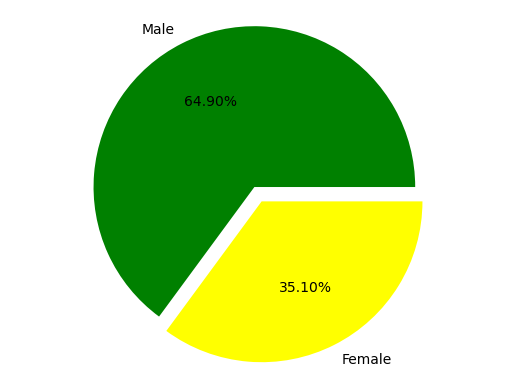

In [25]:
males = (titanic['Sex'] == 1).sum() 
females = (titanic['Sex'] == 2).sum()

print(males)
print(females)

p = [males, females]
plt.pie(p, labels = ['Male', 'Female'], colors = ['green', 'yellow'], explode = (0.1, 0), startangle = 0, autopct="%.2f%%")  

plt.axis('equal')

plt.show()

In [26]:
MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
print(MaleS)

MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
print(MaleN)

FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
print(FemaleS)

FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]
print(FemaleN)

109
468
231
81


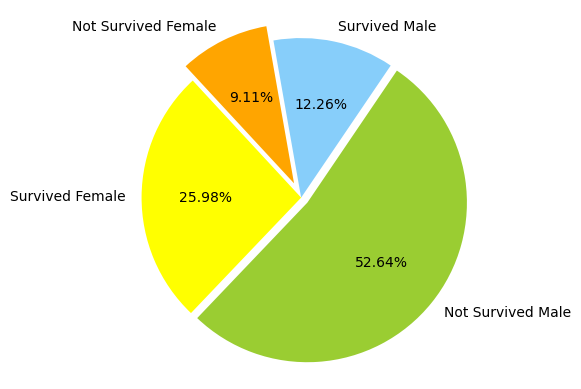

In [27]:
chart=[MaleS,MaleN,FemaleS,FemaleN]

colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]

explode=[0,0.05,0,0.1]

plt.pie(chart, labels=labels, colors=colors, explode=explode, startangle=100, counterclock=False, autopct="%.2f%%")

plt.axis("equal")

plt.show()

## What we learned

1. Import Packages
2. Loading data
3. Understanding meaning of columns
4. Analyzing data
5. Modifying a column 
6. Deleting Columns
7. Filling null values in `Age` column
8. Checking importance of `Embarked` column
9. Ploting Bar Charts